In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import keras
import keras.applications

Using TensorFlow backend.


In [3]:
vgg16 = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
xception = keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
resnet50 = keras.applications.resnet50.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
mobilenet = keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [65]:
densenet = keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [66]:
nasnet = keras.applications.nasnet.NASNetMobile(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

resnet50
Predicted class:
motor_scooter (n03791053) with probability 0.94


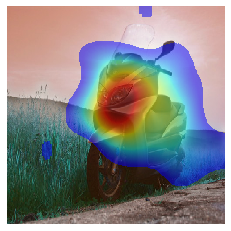

Predicted class:
Dutch_oven (n03259280) with probability 1.00


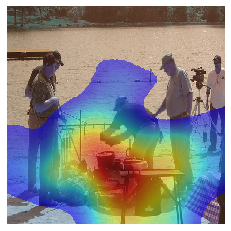

Predicted class:
forklift (n03384352) with probability 1.00


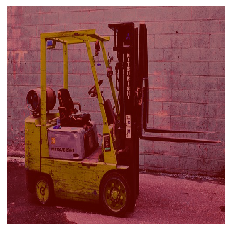

Predicted class:
bull_mastiff (n02108422) with probability 0.40


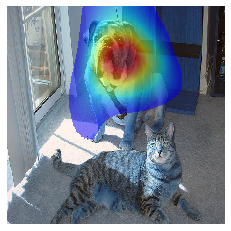

Predicted class:
bull_mastiff (n02108422) with probability 0.67


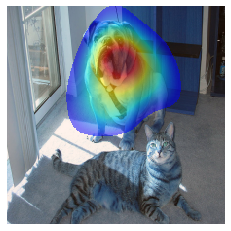



mobilenet_1.00_224
Predicted class:
motor_scooter (n03791053) with probability 0.90


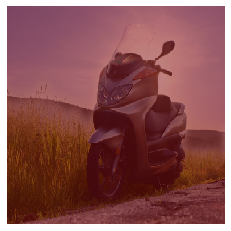

Predicted class:
Dutch_oven (n03259280) with probability 1.00


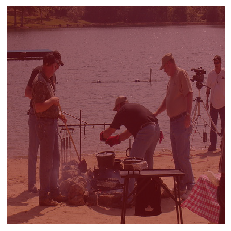

Predicted class:
forklift (n03384352) with probability 1.00


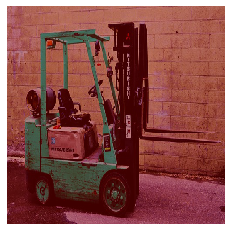

Predicted class:
bull_mastiff (n02108422) with probability 0.89


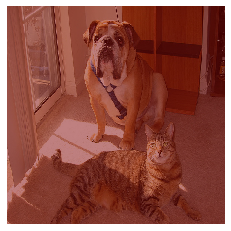

Predicted class:
bull_mastiff (n02108422) with probability 0.80


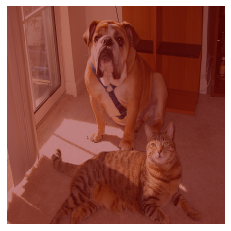



densenet121
Predicted class:
motor_scooter (n03791053) with probability 0.96


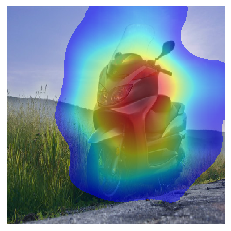

Predicted class:
Dutch_oven (n03259280) with probability 1.00


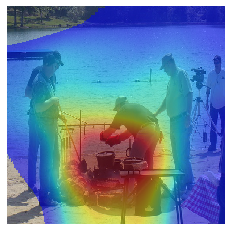

Predicted class:
forklift (n03384352) with probability 1.00


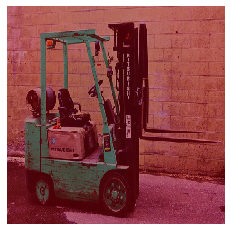

Predicted class:
bull_mastiff (n02108422) with probability 0.47


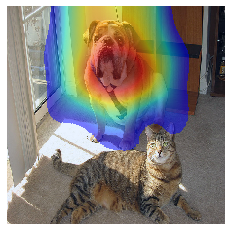

Predicted class:
bull_mastiff (n02108422) with probability 0.51


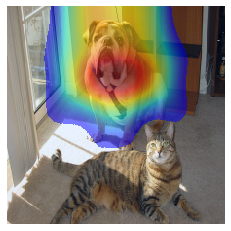



NASNet
Predicted class:
motor_scooter (n03791053) with probability 0.84


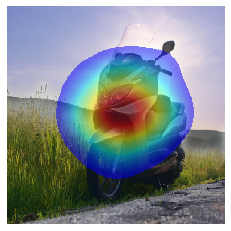

Predicted class:
Dutch_oven (n03259280) with probability 0.91


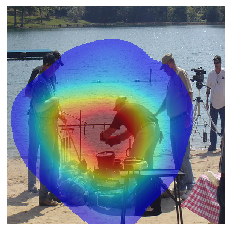

Predicted class:
forklift (n03384352) with probability 0.94


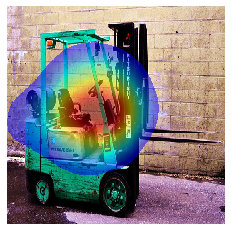

Predicted class:
bull_mastiff (n02108422) with probability 0.45


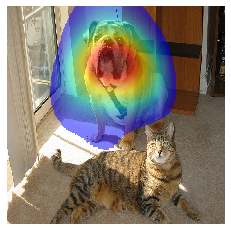

Predicted class:
bull_mastiff (n02108422) with probability 0.72


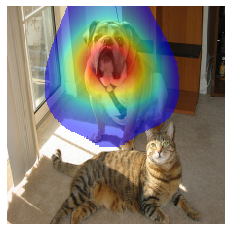

In [67]:
import eli5
import os
import matplotlib.pyplot as plt

def show_dir(model, img_dir, *args, **kwargs):
    imgs = os.listdir(img_dir)
    for i, img in enumerate(imgs):
        I = show(model, os.path.join(img_dir, img), *args, **kwargs)

def show(model, img, *args, **kwargs):
    E = eli5.explain_prediction(model, img, *args, **kwargs)
    I = eli5.formatters.image.format_as_image(E)
    return I

# img = 'examples/cat_dog.jpg'
# img = 'examples/170997360_8193925eef.jpg'
# show(vgg16, img, layers="block5_conv3")
# show(xception, img, layers="block14_sepconv2_act")

TESTMODELS = [
#     (xception, keras.applications.xception.preprocess_input, "block14_sepconv2_act"),
    (resnet50, keras.applications.resnet50.preprocess_input),
    (mobilenet, keras.applications.mobilenet.preprocess_input),
    (densenet, keras.applications.densenet.preprocess_input),
    (nasnet, keras.applications.nasnet.preprocess_input),
]
for model, preprocess_fn in TESTMODELS:
    print(model.name)
    show_dir(model, 'examples', layers="block14_sepconv2_act", preprocessing=preprocess_fn)
    print('='*50, end='\n\n\n')

# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)
# show(resnet50, 'examples/cat_dog.jpg', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)

# show_dir(resnet50, 'examples', layers='activation_49', preprocessing=keras.applications.resnet50.preprocess_input)

<bound method Network.get_config of <keras.engine.training.Model object at 0x7f4e81154320>>

In [29]:
from IPython.core.display import display, HTML
display(HTML('<img src="./examples/cat_dog.jpg"></img>'))

In [30]:
%%html
<canvas id="myCanvas" width="200" height="100" style="border:1px solid #000000;">
     var c = document.getElementById("myCanvas");
    var ctx = c.getContext("2d");
    ctx.moveTo(0, 0);
    ctx.lineTo(200, 100);
    ctx.stroke(); 
</canvas>

In [32]:
%%html
'<img src="./examples/cat_dog.jpg" width=224 height=224></img>

import tensorflow as tf
import numpy as np
a = np.array([2, 3])
b = np.array([4, 5])
with tf.Session().as_default():
    print(tf.multiply(a, b).eval())
print(a*b)